# EXAMPLE EXERCISES

### log_correction

* Moving from darker to whiter intensities

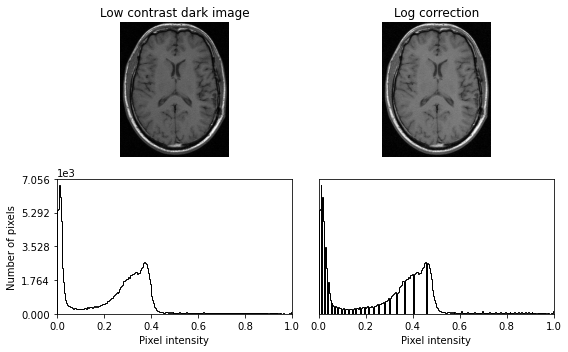

In [1]:
import numpy as np
from skimage import io
import plot_tools as plt_hist
import matplotlib.pyplot as plt

# Load and normalize image
img = img = io.imread('Brain.tif')#as_gray=True)
img = img/np.max(img)

# log-correction is performed
img_log_corrected = (np.log(1+img))/np.log(1+np.max(img))

# Display results
fig = plt.figure(figsize=(8, 5))
axes = np.zeros((2, 2), dtype=np.object)
axes[0, 0] = fig.add_subplot(2, 2, 1)
for i in range(1, 2):
    axes[0, i] = fig.add_subplot(2, 2, 1+i, sharex=axes[0,0], sharey=axes[0,0])
for i in range(0, 2):
    axes[1, i] = fig.add_subplot(2, 2, 3+i)
    
ax_img, ax_hist = plt_hist.plot_img_and_hist(img, axes[:, 0])
ax_img.set_title('Low contrast dark image')

y_min, y_max = ax_hist.get_ylim()
ax_hist.set_ylabel('Number of pixels')
ax_hist.set_yticks(np.linspace(0, y_max, 5))

ax_img, ax_hist = plt_hist.plot_img_and_hist(img_log_corrected, axes[:, 1])
ax_img.set_title('Log correction')

# prevent overlap of y-axis labels
fig.tight_layout()
plt.show()

### hist_equalization
* NORMALIZE HISTOGRAM VALUES

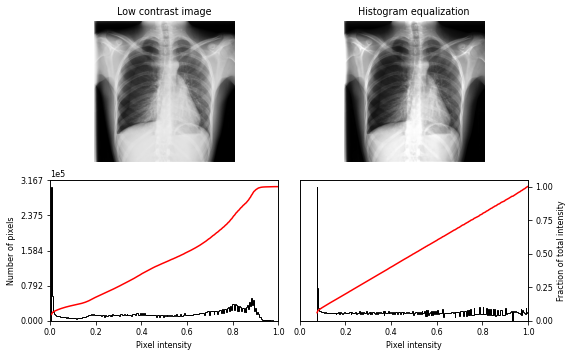

In [13]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

from skimage import exposure
from skimage import io
import plot_tools as plt_hist

matplotlib.rcParams['font.size'] = 8

# Load the image
img = io.imread('Chest_RX.tif')#,as_gray=True)

# Since the result of the equalization is a normalized image, we also normalize
# the original image.
img = img/np.max(img)

# Equalization
img_eq = exposure.equalize_hist(img)

# Display results
fig = plt.figure(figsize=(8, 5))
axes = np.zeros((2, 2), dtype=np.object)
axes[0, 0] = fig.add_subplot(2, 2, 1)
for i in range(1, 2):
    axes[0, i] = fig.add_subplot(2, 2, 1+i, sharex=axes[0,0], sharey=axes[0,0])
for i in range(0, 2):
    axes[1, i] = fig.add_subplot(2, 2, 3+i)

ax_img, ax_hist, ax_cdf = plt_hist.plot_img_and_hist(img, axes[:, 0], printCDF=True)
ax_img.set_title('Low contrast image')

y_min, y_max = ax_hist.get_ylim()
ax_hist.set_ylabel('Number of pixels')
ax_hist.set_yticks(np.linspace(0, y_max, 5))

ax_img, ax_hist, ax_cdf = plt_hist.plot_img_and_hist(img_eq, axes[:, 1], printCDF=True)
ax_img.set_title('Histogram equalization')

ax_cdf.set_ylabel('Fraction of total intensity')
ax_cdf.set_yticks(np.linspace(0, 1, 5))

# prevent overlap of y-axis labels
fig.tight_layout()
plt.show()

### gamma_correction

* aka Power Law Transformation
* CONTRAST INCREASED
* gamma >1 to make it darker

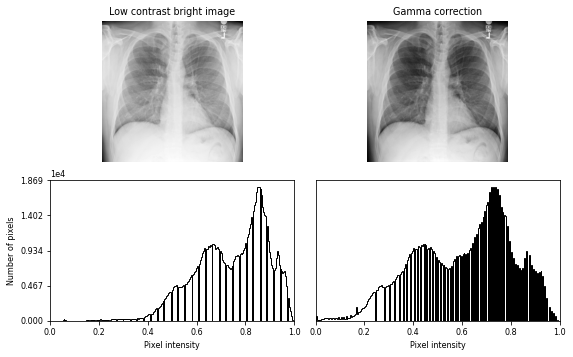

In [18]:
import numpy as np
from skimage import io
import plot_tools as plt_hist
import matplotlib.pyplot as plt

# Load and normalize image
img = img = io.imread('Chest_RX_bright.png',as_gray=True)
img = img/np.max(img) # avoid pixel intensities be out of bounds

# gamma is initialized
gamma = 2

# gamma-correction exponent is computed
img_log = np.log(img)*gamma

# gamma-correction is performed
img_gamma_corrected = np.exp(img_log)

# Display results
fig = plt.figure(figsize=(8, 5))
axes = np.zeros((2, 2), dtype=np.object)
axes[0, 0] = fig.add_subplot(2, 2, 1)
for i in range(1, 2):
    axes[0, i] = fig.add_subplot(2, 2, 1+i, sharex=axes[0,0], sharey=axes[0,0])
for i in range(0, 2):
    axes[1, i] = fig.add_subplot(2, 2, 3+i)
    
ax_img, ax_hist = plt_hist.plot_img_and_hist(img, axes[:, 0])
ax_img.set_title('Low contrast bright image')

y_min, y_max = ax_hist.get_ylim()
ax_hist.set_ylabel('Number of pixels')
ax_hist.set_yticks(np.linspace(0, y_max, 5))

ax_img, ax_hist = plt_hist.plot_img_and_hist(img_gamma_corrected, axes[:, 1])
ax_img.set_title('Gamma correction')

# prevent overlap of y-axis labels
fig.tight_layout()
plt.show()